### Métriques

`NB`: Pour le clustering
* X est le vecteur des étiquetes des observations
* Y est le vecteur des identifiants de clusters des observations
* n = |X| = |Y|: est le nombre d'observations
* X' est l'ensemble des valeurs possibles contenus dans X
* Y' est l'ensemble des valeurs possibles contenus dans Y

#### `Information mutuelle, Information mutuelle normalisé`

`Information mutuelle`

l'information mutuelle entre deux vecteurs(ou variables aléatoires) X, Y est une quantification en moyenne des informations contenues dans les deux variables simmultanément.
Il permet de mésurer à quel point les éléments de X et Y se ressemblent, selon leur dispersion et leur taux (probabilité) d'apparition.
Il peut ainsi permettre de mésurer la similitude entre deux vecteurs X et Y.


La formule de l'information mutuelle est la suivante:

$ I(X,Y) = \sum_{x,y} P(x,y)\times \text{Inf}(x,y) \text{ avec } \text{Inf}(x,y) = \log\left( \frac{P(x,y)}{P(x)*P(y)} \right) $

En notant que `x` et `y` designent respectivement des valeurs possibles de `X` et de `Y`, on peut affirmer que $\text{Inf}(x,y)$ permet de mésurer la correspondance qu'on obtient de `x` et `y` dans le sens où si x et y sont semblables (au sens de leur probabilité d'apparition) alors $\text{Inf}(x,y) = 1$. 

De plus:
* plus x et y sont dépendants, plus $\text{Inf}(x,y) \rightarrow 1$ et $I(X,Y) \rightarrow 1$
* moins ils ne le sont, plus $\text{Inf}(x,y) \rightarrow 0$ et $I(X,Y) \rightarrow 0$

`l'information mutuelle normalisé` entre X et Y est le rapport entre l'information mutuelle entre X et Y, et le produit des entropies (quantité d'information) de X et Y

In [1]:
from sklearn.metrics import normalized_mutual_info_score

labels = [0, 1, 2, 1, 0, 0, 2]
labels_clusters = [2, 1, 0, 2, 2, 1, 0]

NMI = normalized_mutual_info_score(labels, labels_clusters)
print(f"NMI = {NMI}")

NMI = 0.5636355530993448


#### `Exactitude`

l'exactitude permet de mésurer ou encore d'estimer la probabilité de prédictions exactes d'un modèle supervisé.

Il mésure pour deux séquences X et Y, le taux d'éléments contenus dans X et Y suivant leur ordre. Ce taux peut ainsi etre vu comme un taux de similitude entre X et Y en sachant qu'ils ont des éléments contenus dans un meme ensemble de valeurs possibles.

En clustering, comme ce n'est pas le cas, il faut trouver la correspondance entre un element `x` des valeurs possibles de X et un element `y` des valeurs possibles de Y, de tel sorte qu'on aura l'exactitude maximale.

On peut donc voir qu'on revient à un problème d'allocation de ressources, où on souhaite allouer un cluster `y` à une étiquete `x`, avec le cout étant le nombre de correspondance en position entre `y` et `x`.

On a donc :

$ ACC(X,Y) = \max_{alloc \in P} \frac{1}{n} \sum_{i=1}^{n} 1(alloc(Y_i) = X_i) $ 

avec "$P$" étant l'ensemble des permutations possibles de Y et "$\text{alloc}$" la fonction d'allocation à trouver 

Ainsi ce qu'on souhaite c'est que $ACC(X,Y)$ soit égale à 1 ou proche de 1

In [3]:
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import numpy as np

cm = confusion_matrix(labels, labels_clusters)
# on trouve l'allocation idéale en resolvant le problème de maximisation transformé en problème de minimisation
cm_for_alignement = -np.array(cm)
rowCorrect, ColCorrect = linear_sum_assignment(cm_for_alignement)
cm_for_alignement = cm[:,ColCorrect]

for i in range(len(ColCorrect)):
    print(f" le cluster {ColCorrect[i]} correspond à la classe {rowCorrect[i]}")

ACC = np.trace(cm_for_alignement) / np.sum(cm_for_alignement)
print(f"ACC = {ACC}")

 le cluster 2 correspond à la classe 0
 le cluster 1 correspond à la classe 1
 le cluster 0 correspond à la classe 2
ACC = 0.7142857142857143


`NB` : les étiquetes sont en lignes et les clusters en colonnes

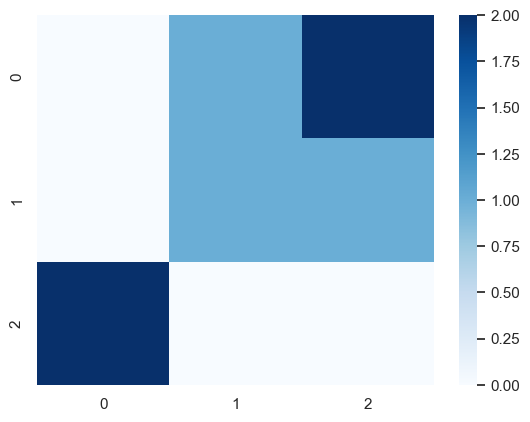

In [10]:
import seaborn as sns
ax = sns.heatmap(cm, cmap="Blues")

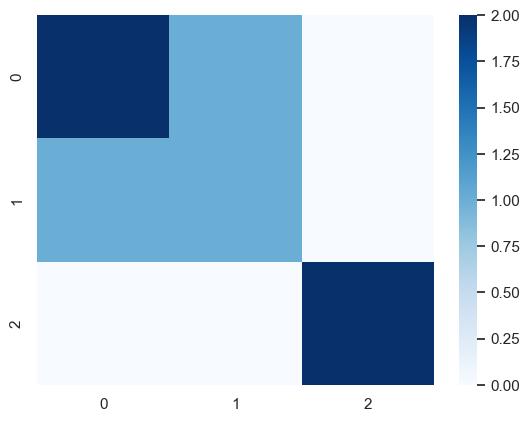

In [11]:
ax = sns.heatmap(cm_for_alignement,cmap="Blues")

#### `Pureté`

La purété est une mésure qu'on utilise pour quantifier le dégré d'homogénité d'une sequence Y compte tenu d'une autre X.
On a :

$ PUR(X,Y) = \frac{ \sum_{ y \in Y'} \left( \max_{x \in X'} card(\{ i| X_i = x, Y_i = y, i \in 1..n \})\right)}{n} $

X' et Y' étant les ensembles de valeurs possibles de X et Y respectivement.

Il permet de quantifier l'homogénité, dans la mésure où pour chaque valeur possible de Y, on recherche la valeur possible de X qui correspond le plus (en terme d'apparition en ordre). Or cela traduit en un sens l'homogénité. 

On voit que:
* plus on a des groupes de 'y' homogènes selon X, plus $PUR(X,Y) \rightarrow 1$ 
* moins on a des groupes de 'y' homogènes selon X, plus $PUR(X,Y) \rightarrow 0$ 

Plus il y'a on voit des 

In [12]:
cm = confusion_matrix(labels, labels_clusters)
PUR = np.sum(np.max(cm, axis=0)) / np.sum(cm)
print(f"PUR = {PUR}")

PUR = 0.7142857142857143
